In [9]:
import pandas as pd
import numpy as np
import sys
import time

sys.path.append('../../../')
from utils import modelling as mod
from utils import utils
from utils import paths
import wandb

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [7]:
df = pd.read_csv('/Users/tudor/Documents/phd/coding/project_CF/data/final_df_aberdeen.csv')
# df = pd.read_csv('/gws/nopw/j04/ai4er/users/ts809/era5_final/final_df_aberdeen.csv')    # JASMIN

weights = mod.CalcClassWeights(df['floods'])
df_to_analyse = df.drop(columns=['Unnamed: 0.1', 'time', 'Unnamed: 0', 'floods', 'time_ok', 't'])

X = df_to_analyse.drop(columns=['floods_x4'])
y = df_to_analyse['floods_x4']

X_train = X.iloc[0:int(len(X) *.8)] 
X_test = X.iloc[int(len(X) *.8):int(len(X) *.9)]
X_val = X.iloc[int(len(X) *.9):]

y_train = y.iloc[0:int(len(y) *.8)]
y_test = y.iloc[int(len(y) *.8):int(len(y) *.9)]
y_val = y.iloc[int(len(y) *.9):]

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [67]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [50]:
weights
# prior_weights = np.array([0.0001969178082191781, 0.9998030821917808])
# prior_weights.shape

(2,)

In [ ]:
# catNB = CategoricalNB()
# catNB.fit(X_train, y_train)

compNB= ComplementNB(
    alpha=10, 
    fit_prior=False, 
    class_prior=prior_weights, 
    norm=False
)
compNB.fit(X_train, y_train)

multiNB = MultinomialNB(
    alpha=10, 
    fit_prior=False, 
    class_prior=prior_weights
)
multiNB.fit(X_train, y_train)

MultinomialNB(alpha=10, class_prior=array([1.96917808e-04, 9.99803082e-01]),
              fit_prior=False)

In [61]:
from sklearn.metrics import balanced_accuracy_score
# y_pred_cat = catNB.predict(X_test)
# print(balanced_accuracy_score(y_test, y_pred_cat))
# Fails, because X_test is outside [0,1].
y_pred_comp = compNB.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred_comp))

y_pred_multi = multiNB.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred_multi))

0.9362349914236707
0.9301029159519725


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def confusionMatrix(y_tested,y_predicted):
    cnf_matrix = confusion_matrix(y_tested, y_predicted)

    labels = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('True')
    plt.xlabel('Predicted')

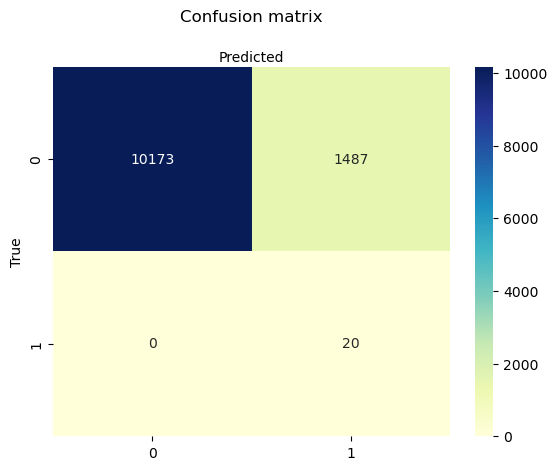

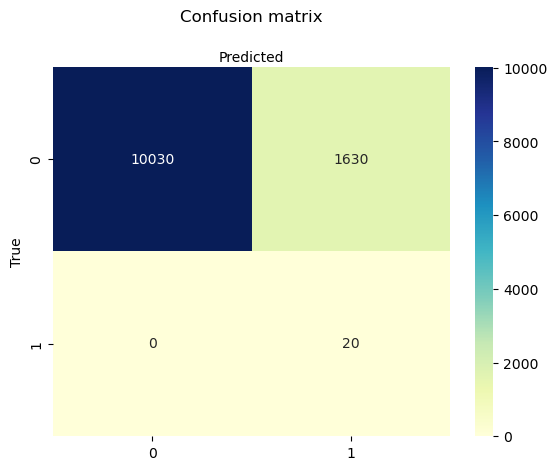

In [62]:
confusionMatrix(y_test, y_pred_comp)
confusionMatrix(y_test, y_pred_multi)

In [ ]:
'''
X BernoulliNB()   - Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.
X CategoricalNB() - discrete features, categorically distributed.
V ComplementNB()  - Rennie et al. (2003). Designed to correct the “severe assumptions” made by the MultinomialNB() classifier. Particularly suited for imbalanced data sets.
X GaussianNB()    -
V MultinomialNB() - discrete features, multinomially distributed.

prior_weights: the prior prob of the classes. If None, the priors are adjusted according to the weights of the data, so basically is like saying class_weight=weights.

'''